In [17]:
import pandas as pd
from glob import glob

import numpy as np
import plotly.express as pe
from IPython.display import Markdown
width = 1000

# Load data

In [2]:
url_data = "https://github.com/jupyterhub/binder-data/raw/master/billing/data/proc/data.json"
data = pd.read_json(url_data, orient='split')
data['date'] = pd.to_datetime(data['date'])

In [9]:
template = 'plotly_white'

In [25]:
start_date = data['date'].min()
end_date = data['date'].max()
Markdown(f"**Showing data from {start_date:%Y-%m-%d} to {end_date:%Y-%m-%d}**")

**Showing data from 2017-12-13 to 2019-08-12**

# Cost by day

In [3]:
costs = data.groupby(['project_id', 'date']).sum()['cost']
costs = costs.reset_index()
weekly_costs = costs.groupby("project_id").resample("w", on="date").sum().reset_index()

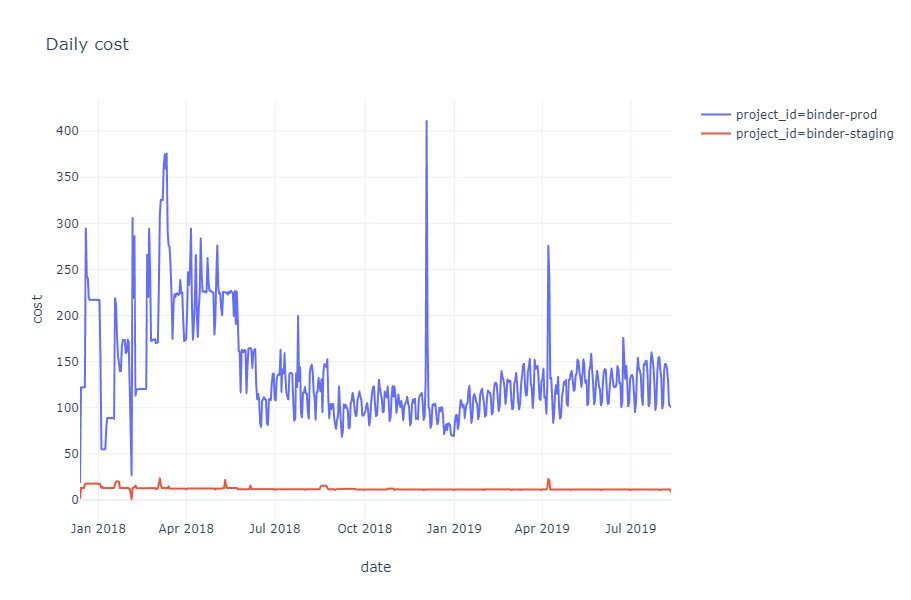

In [8]:
pe.line(costs.reset_index(), x='date', y='cost', color='project_id',
        width=width, template=template, title="Daily cost")

# Costs by week

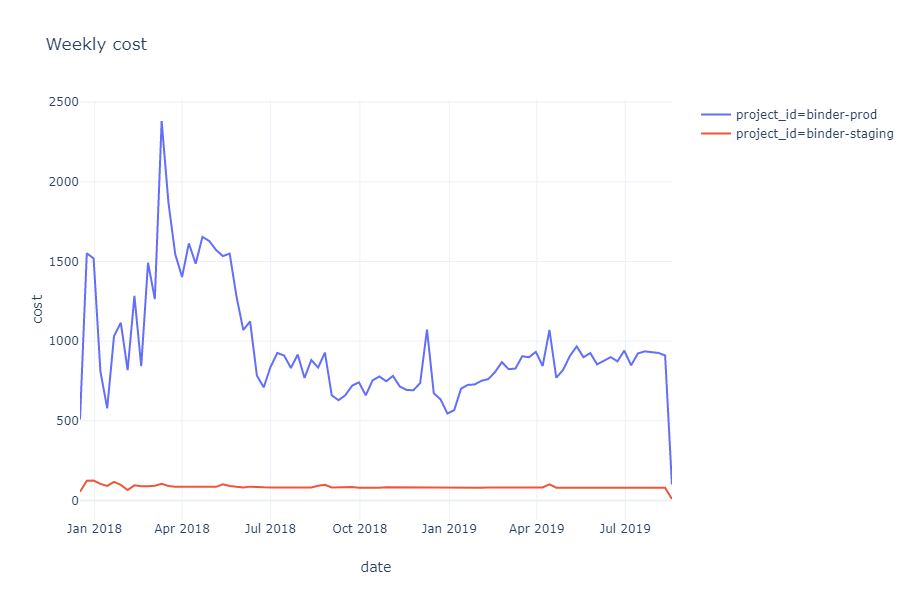

In [14]:
pe.line(weekly_costs, x='date', y='cost', color='project_id',
        width=width, template=template, title="Weekly cost")

# Plot by category

In [12]:
categories = data.groupby(['date', 'category', 'line_item']).sum()['cost'].reset_index()
categories = categories.groupby(['date', 'category']).sum().reset_index()
categories['log_cost'] = categories['cost'].apply(np.log)

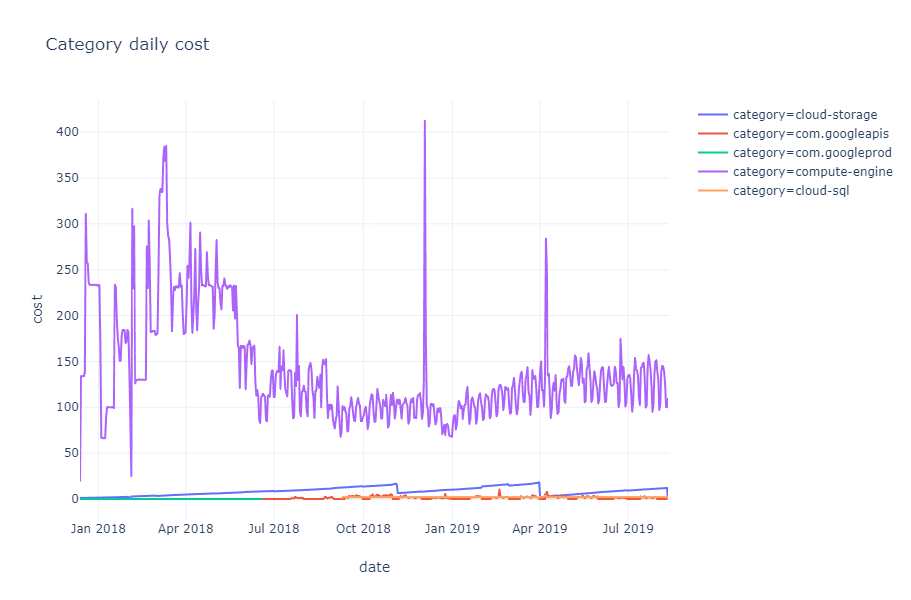

In [13]:
pe.line(categories, x='date', y='cost', color='category',
        width=width, template=template, title="Category daily cost")

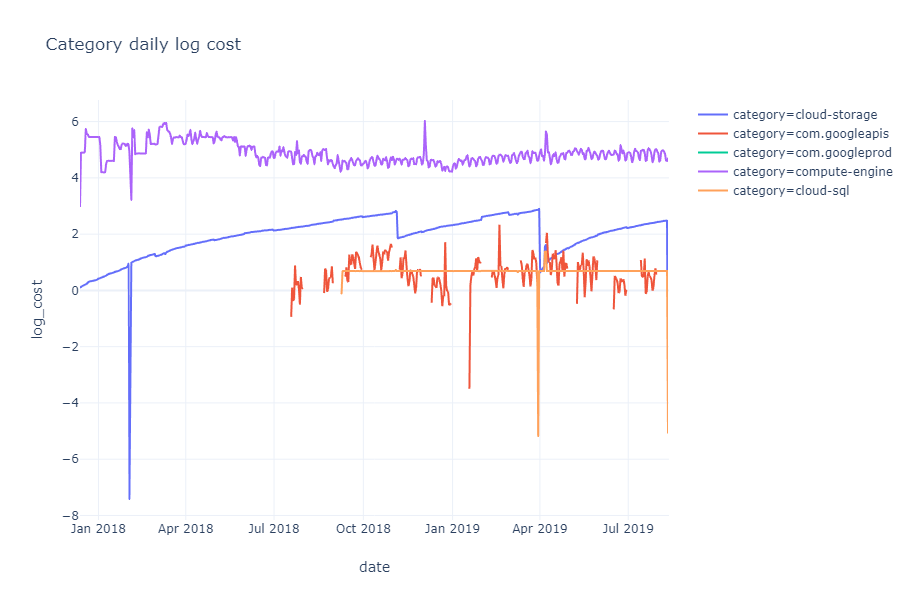

In [16]:
pe.line(categories, x='date', y='log_cost', color='category',
        width=width, template=template, title="Category daily log cost")